In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.measurement.io import readoutnc

In [3]:
rnc = readoutnc.ReadoutNetCDF('/artemis/readout/2016-03-01_103311_cw_noise_test.nc')

In [4]:
fr,s21,err = rnc.sweep_20160301103524.select_by_index(7)

In [5]:
fr.mean()

1108.58984375

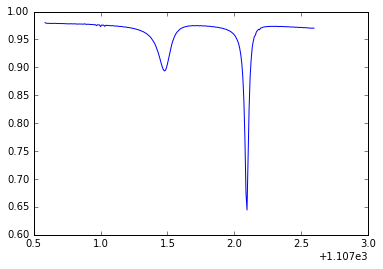

In [6]:
plot(fr,np.abs(s21))

In [7]:
import kid_readout.analysis.resonator.lmfit_resonator as resonator

In [8]:
from kid_readout.analysis.resonator import lmfit_models

In [9]:
model = ((lmfit_models.GeneralCableModel()
                                                       * lmfit_models.LinearResonatorModel(prefix='bg_'))
                                                      * lmfit_models.LinearResonatorModel())

In [96]:
res = resonator.CollidingLinearResonatorsWithCable(frequency=fr*1e6,s21=s21,errors=err*2)

In [97]:
res.fit()

In [98]:
res.fit()

In [99]:
res.current_params

Parameters([('delay',
             <Parameter 'delay', -3.1299454785247621e-05, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', 1.7682890205581314, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=1107585937.5 (fixed), bounds=[-inf:inf]>),
            ('A_mag',
             <Parameter 'A_mag', 0.98249640686523287, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', -6.5173348749623353e-09, bounds=[-inf:inf]>),
            ('bg_f_0',
             <Parameter 'bg_f_0', 1109092894.8933589, bounds=[1107585937.5:1109593750.0]>),
            ('bg_Q',
             <Parameter 'bg_Q', 30255.147775339119, bounds=[55.238910505836579:141964.0]>),
            ('bg_Q_e_real',
             <Parameter 'bg_Q_e_real', 88681.71150522797, bounds=[0:10000000.0]>),
            ('bg_Q_e_imag',
             <Parameter 'bg_Q_e_imag', 8624.6449450682849, bounds=[-10000000.0:10000000.0]>),
            ('f

In [100]:
res.model

<lmfit.Model: ((Model(general_cable) * Model(linear_resonator, prefix='bg_')) * Model(linear_resonator, prefix='fg_'))>

In [101]:
s21c = res.remove_background(fr,s21)

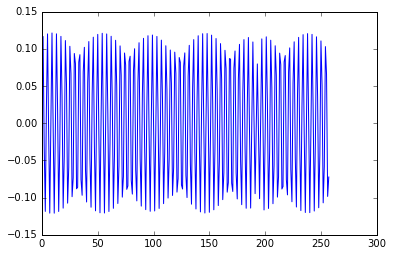

In [102]:
plot(s21c)

In [103]:
res.model.right

<lmfit.Model: Model(linear_resonator, prefix='fg_')>

In [104]:
res.model.left.right

<lmfit.Model: Model(linear_resonator, prefix='bg_')>

In [105]:
res.model.right.make_funcargs(params=res.current_params)

{'Q': 10471.540426060639,
 'Q_e_imag': 32221.501712383702,
 'Q_e_real': 116653.60833593263,
 'f_0': 1108486149.6404414}

In [106]:
res.model.left.right.make_funcargs(params=res.current_params,strip=True)

{'Q': 30255.147775339119,
 'Q_e_imag': 8624.6449450682849,
 'Q_e_real': 88681.71150522797,
 'f_0': 1109092894.8933589}

In [107]:
s21c = res.remove_background(frequency=fr*1e6,s21_raw=s21)

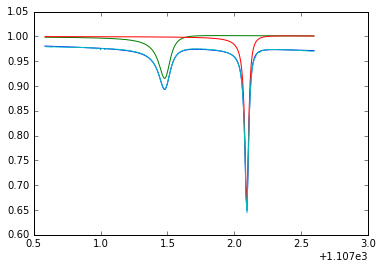

In [108]:
plot(fr,np.abs(res.model.eval(f=fr*1e6,params=res.current_params)))
plot(fr,np.abs(res.model.right.eval(f=fr*1e6,params=res.current_params)))
plot(fr,np.abs(res.model.left.right.eval(f=fr*1e6,params=res.current_params)))

plot(fr,np.abs(s21))
#plot(fr,np.abs(s21c))


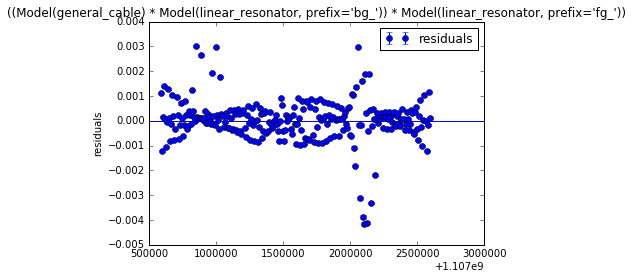

In [109]:
res.current_result.plot_residuals()

In [110]:
print res.current_result.fit_report()

[[Model]]
    ((Model(general_cable) * Model(linear_resonator, prefix='bg_')) * Model(linear_resonator, prefix='fg_'))
[[Fit Statistics]]
    # function evals   = 16
    # data points      = 516
    # variables        = 12
    chi-square         = 54227.433
    reduced chi-square = 107.594
    Akaike info crit   = 2438.037
    Bayesian info crit = 2488.990
[[Variables]]
    delay:        -3.1299e-05 +/- 1.71e-11 (0.00%) (init=-3.129945e-05)
    phi:           1.76828902 +/- 0.000123 (0.01%) (init= 1.768289)
    f_min:         1.107586e+09 (fixed)
    A_mag:         0.98249640 +/- 9.89e-05 (0.01%) (init= 0.9824965)
    A_slope:      -6.5173e-09 +/- 8.78e-11 (1.35%) (init=-6.517392e-09)
    bg_f_0:        1.1091e+09 +/- 56.43326 (0.00%) (init= 1.109093e+09)
    bg_Q:          30255.1477 +/- 78.04039 (0.26%) (init= 30254.85)
    bg_Q_e_real:   88681.7115 +/- 161.3958 (0.18%) (init= 88681.27)
    bg_Q_e_imag:   8624.64494 +/- 135.2974 (1.57%) (init= 8625.075)
    fg_f_0:        1.1085e+09 

In [113]:
samp = res.current_result.emcee(params=res.current_params,steps=500)

In [114]:
import corner

In [115]:
samp.flatchain.shape

(50000, 12)

In [120]:
res.model.param_names

['delay',
 'phi',
 'f_min',
 'A_mag',
 'A_slope',
 'bg_f_0',
 'bg_Q',
 'bg_Q_e_real',
 'bg_Q_e_imag',
 'fg_f_0',
 'fg_Q',
 'fg_Q_e_real',
 'fg_Q_e_imag']

In [155]:
samp.chain.dtype

dtype('float64')

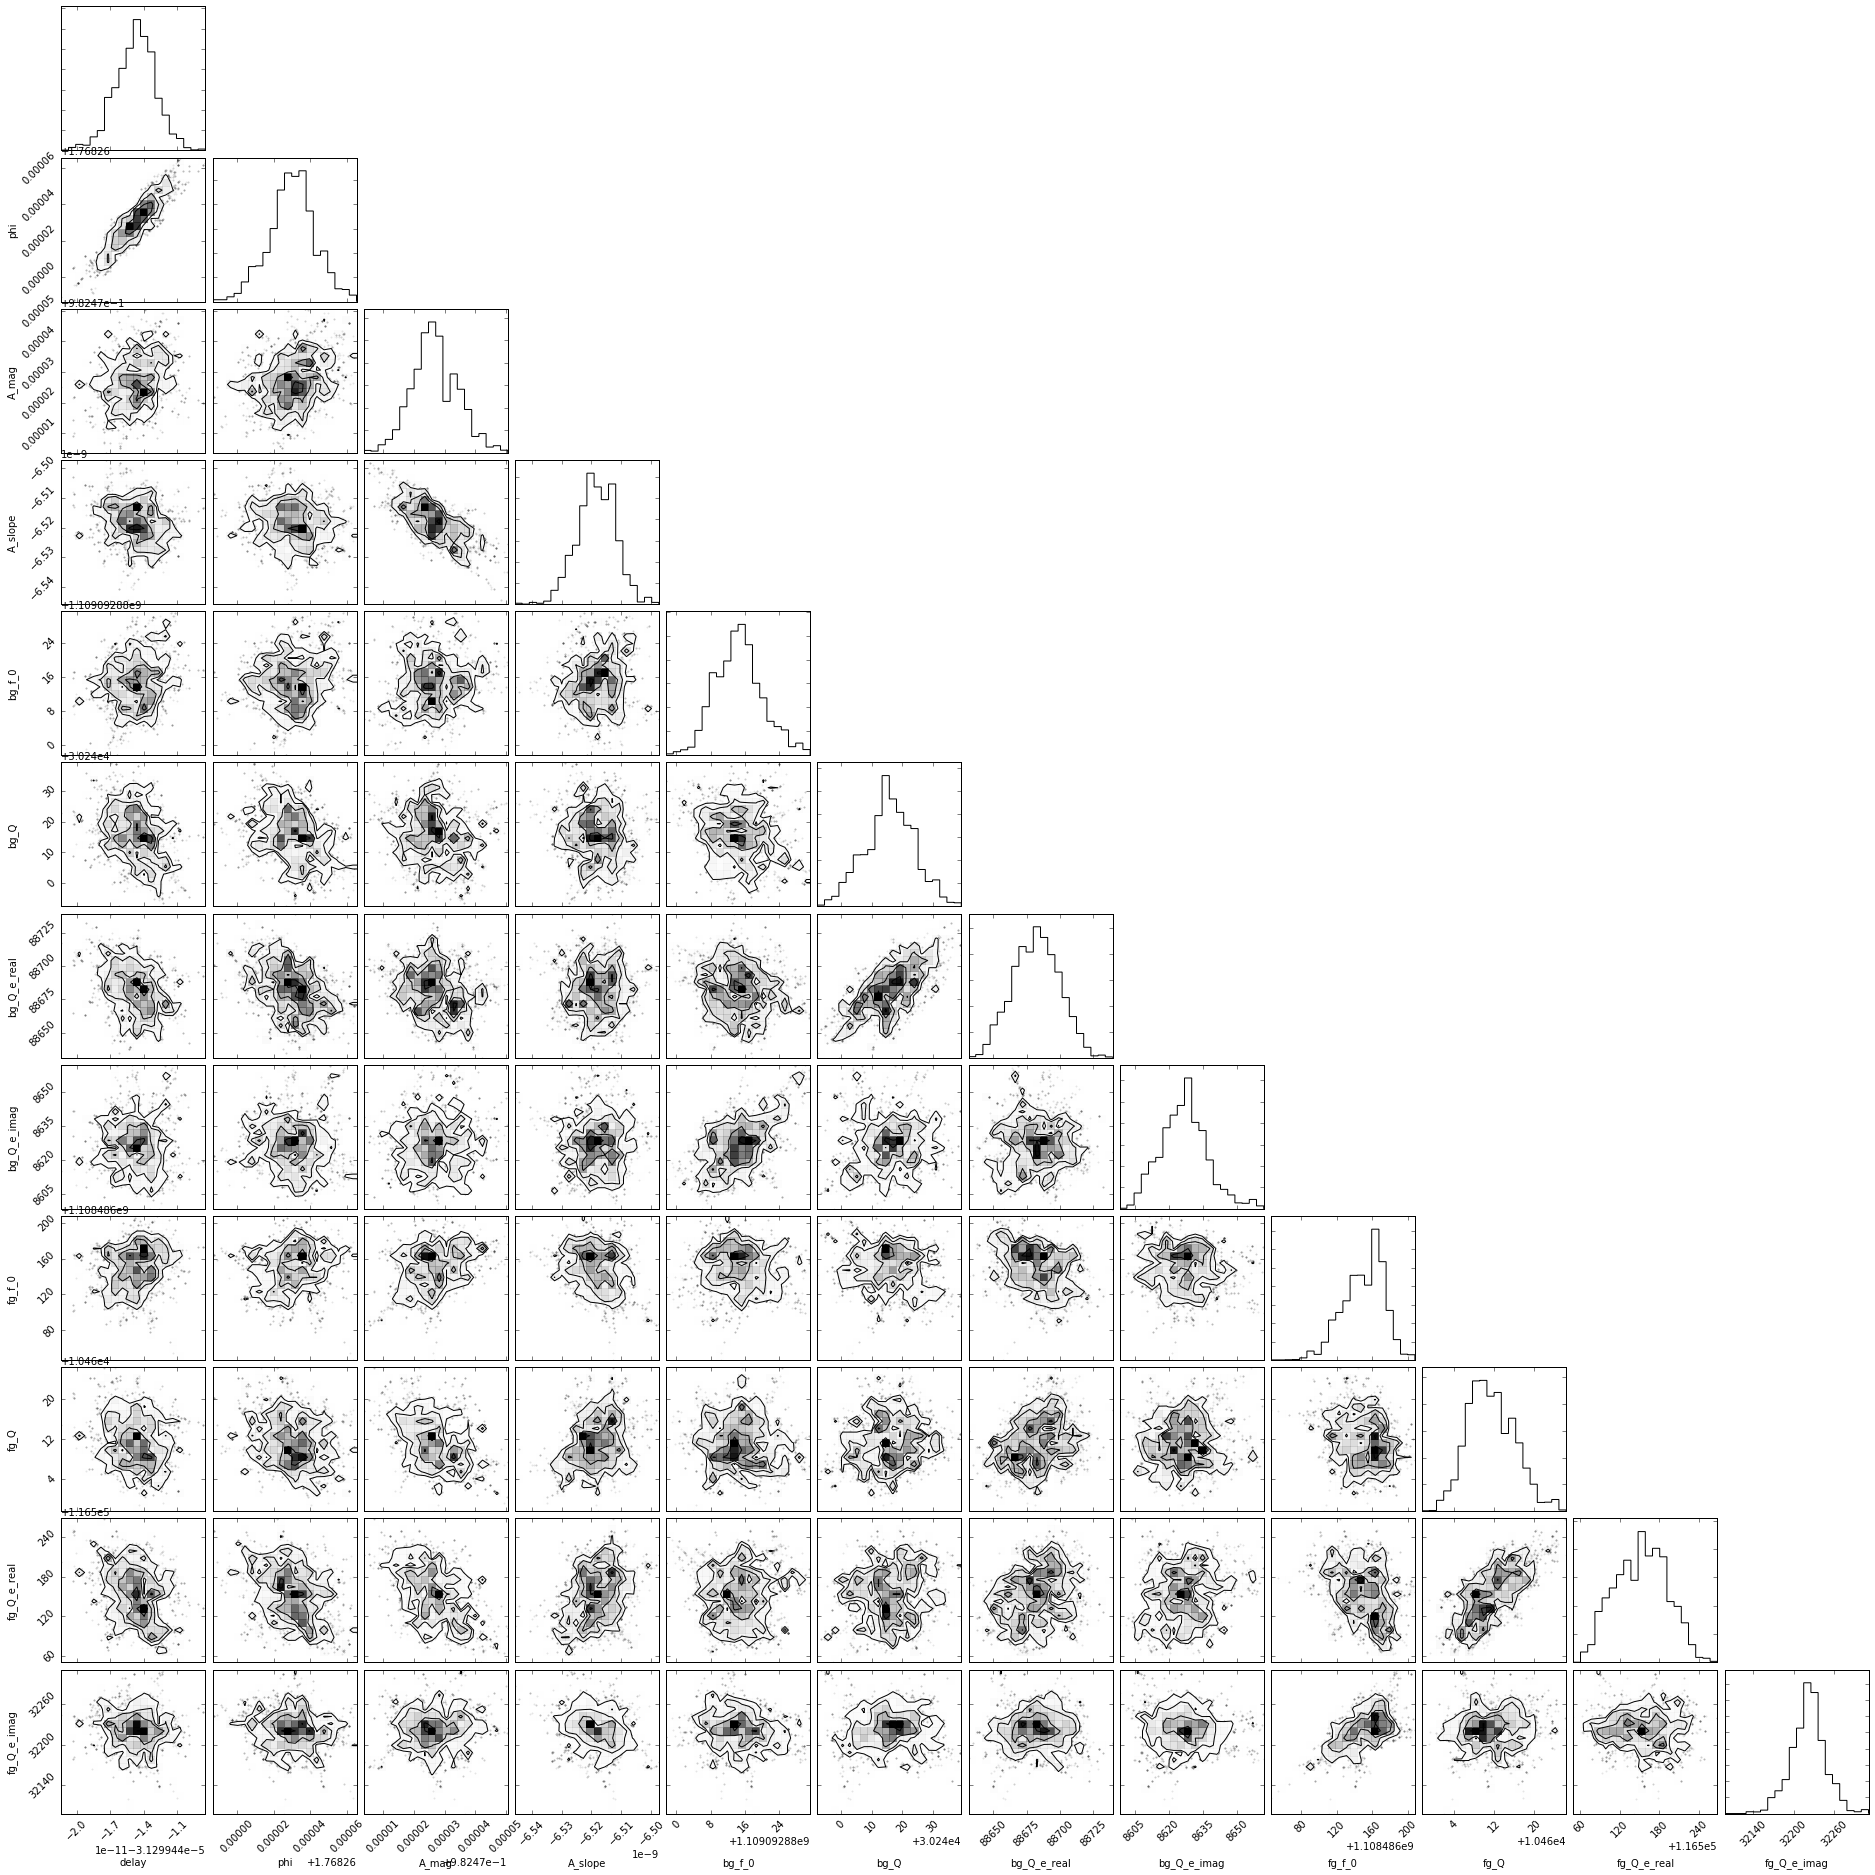

In [160]:
_ = corner.corner(samp.chain[::5,300:,:].reshape((-1,12)),labels=[x for x in res.model.param_names if x != 'f_min'])

In [132]:
samp.chain.shape

(100, 500, 12)

In [159]:
len(res.model.param_names)

13

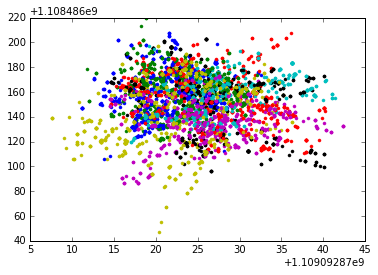

In [154]:
_=plot(samp.chain[::5,200:,4].T,samp.chain[::5,200:,8].T,'.')

In [127]:
samp.lnprob.shape

(100, 500)

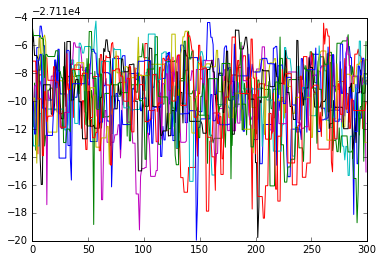

In [130]:
plot(samp.lnprob[::10,200:].T)


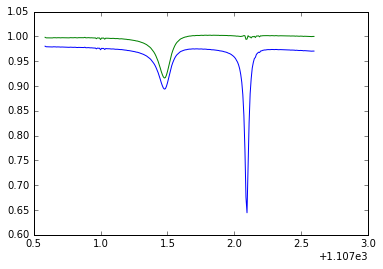

In [30]:
plot(fr,np.abs(s21))
plot(fr,np.abs(s21c))

In [32]:
from kid_readout.analysis.resonator.helpers import *

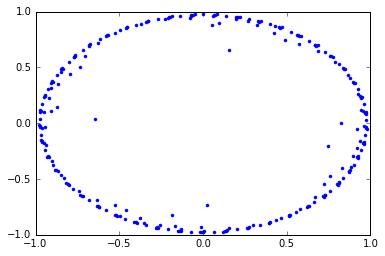

In [37]:
plot_ri(s21,None,'.')